# Hamiltonian Double Pendulums

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
from development.pyscripts.HamiltonianFunctions import hamiltonian_system
from development.pyscripts.DoublePendulumHamiltonian import DoublePendulum

## Defining variables globally

In [2]:
M1, M2, m1, m2, l1, l2, g = sp.symbols("M1, M2, m1, m2, l1, l2, g", positive=True, real=True)

# Define parameters
params = {
    m1: 1,     # mass bob1
    m2: 1,     # mass bob2
    l1: 1,     # length1
    l2: 1,     # length2
    M1: 1,     # mass rod1
    M2: 1,     # mass rod2
    g : 9.81   # acceleration due to gravity
}

init_values = [0, 120, 0, 0]

time = [0, 20, 4000]

----
&nbsp;
### Equations of motion `Simple Model`

The state variables of the Hamiltonian are $\mathcal{H}(\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2})$

In [3]:
eq1, eq2, eq3, eq4 = hamiltonian_system(model='simple')

In [4]:
display(eq1)

Eq(Derivative(theta1(t), t), (-2*l1*l2*m2*p_theta_2(t)*cos(theta1(t) - theta2(t)) + 2*l2**2*m2*p_theta_1(t))/(2*l1**2*l2**2*m2*(m1 + m2*sin(theta1(t) - theta2(t))**2)))

In [5]:
display(eq2)

Eq(Derivative(theta2(t), t), (2*l1**2*m1*p_theta_2(t) + 2*l1**2*m2*p_theta_2(t) - 2*l1*l2*m2*p_theta_1(t)*cos(theta1(t) - theta2(t)))/(2*l1**2*l2**2*m2*(m1 + m2*sin(theta1(t) - theta2(t))**2)))

In [6]:
display(eq3)

Eq(Derivative(p_theta_1(t), t), g*l1*(-m1 - m2)*sin(theta1(t)) - p_theta_1(t)*p_theta_2(t)*sin(theta1(t) - theta2(t))/(l1*l2*(m1 + m2*sin(theta1(t) - theta2(t))**2)) + (l1**2*m1*p_theta_2(t)**2 + l1**2*m2*p_theta_2(t)**2 - 2*l1*l2*m2*p_theta_1(t)*p_theta_2(t)*cos(theta1(t) - theta2(t)) + l2**2*m2*p_theta_1(t)**2)*sin(theta1(t) - theta2(t))*cos(theta1(t) - theta2(t))/(l1**2*l2**2*(m1 + m2*sin(theta1(t) - theta2(t))**2)**2))

In [7]:
display(eq4)

Eq(Derivative(p_theta_2(t), t), -g*l2*m2*sin(theta2(t)) + p_theta_1(t)*p_theta_2(t)*sin(theta1(t) - theta2(t))/(l1*l2*(m1 + m2*sin(theta1(t) - theta2(t))**2)) - (l1**2*m1*p_theta_2(t)**2 + l1**2*m2*p_theta_2(t)**2 - 2*l1*l2*m2*p_theta_1(t)*p_theta_2(t)*cos(theta1(t) - theta2(t)) + l2**2*m2*p_theta_1(t)**2)*sin(theta1(t) - theta2(t))*cos(theta1(t) - theta2(t))/(l1**2*l2**2*(m1 + m2*sin(theta1(t) - theta2(t))**2)**2))

----
&nbsp;
### Instantiating a simple DoublePendulum object

In [8]:
pendulum1 = DoublePendulum(parameters=params, initial_conditions=init_values, 
                           time_vector=time, model='simple')

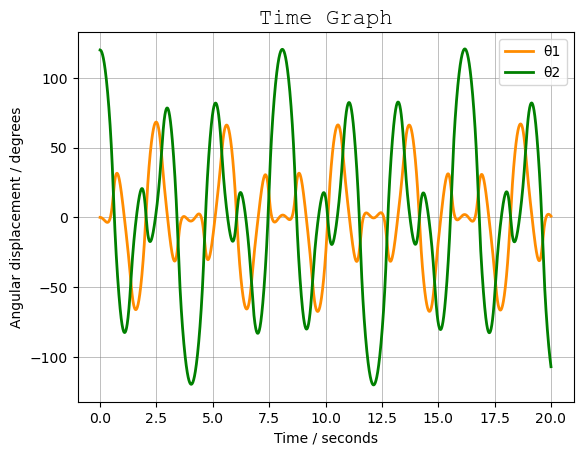

In [9]:
time_graph = pendulum1.time_graph()
plt.show(time_graph)

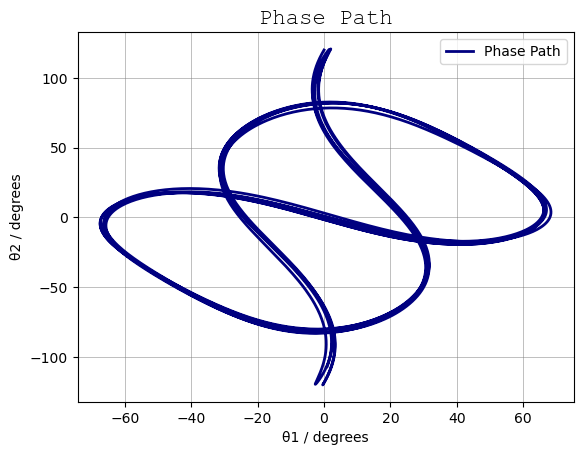

In [10]:
phase_path = pendulum1.phase_path()
plt.show(phase_path)

In [11]:
# Precompute the positions of the pendulum bobs
pendulum1.precompute_positions()

# Create animation of the double pendulum
animation = pendulum1.animate_pendulum(trace=True, static=False, appearance='dark')
#animation.show()

In [12]:
# Accessing the matrix
pendulum1.matrix

Eq(Matrix([
[   Derivative(theta1(t), t)],
[   Derivative(theta2(t), t)],
[Derivative(p_theta_1(t), t)],
[Derivative(p_theta_2(t), t)]]), Matrix([
[                                                                                                                                                                                                                                                               (-2*l1*l2*m2*p_theta_2(t)*cos(theta1(t) - theta2(t)) + 2*l2**2*m2*p_theta_1(t))/(2*l1**2*l2**2*m2*(m1 + m2*sin(theta1(t) - theta2(t))**2))],
[                                                                                                                                                                                                                                      (2*l1**2*m1*p_theta_2(t) + 2*l1**2*m2*p_theta_2(t) - 2*l1*l2*m2*p_theta_1(t)*cos(theta1(t) - theta2(t)))/(2*l1**2*l2**2*m2*(m1 + m2*sin(theta1(t) - theta2(t))**2))],
[g*l1*(-m1 - m2)*sin(theta1(t)) - p_theta_1(t)*p_theta_2(t)

----
&nbsp;
## Equations of motion `Compound Model`

The state variables of the Hamiltonian are $\mathcal{H}(\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2})$

In [13]:
eq1, eq2, eq3, eq4 = hamiltonian_system(model='compound')

In [14]:
display(eq1)

Eq(Derivative(theta1(t), t), 6*(-6*M2*l1*l2*p_theta_2(t)*cos(theta1(t) - theta2(t)) + 14*M2*l2**2*p_theta_1(t))/(M2*l1**2*l2**2*(49*M1 + 9*M2*sin(theta1(t) - theta2(t))**2 + 12*M2)))

In [15]:
display(eq2)

Eq(Derivative(theta2(t), t), 6*(14*M1*l1**2*p_theta_2(t) + 6*M2*l1**2*p_theta_2(t) - 6*M2*l1*l2*p_theta_1(t)*cos(theta1(t) - theta2(t)))/(M2*l1**2*l2**2*(49*M1 + 9*M2*sin(theta1(t) - theta2(t))**2 + 12*M2)))

In [16]:
display(eq3)

Eq(Derivative(p_theta_1(t), t), g*(-M1*l1*sin(theta1(t)) - M2*l1*sin(theta1(t)))/2 - 36*p_theta_1(t)*p_theta_2(t)*sin(theta1(t) - theta2(t))/(l1*l2*(49*M1 + 9*M2*sin(theta1(t) - theta2(t))**2 + 12*M2)) + 108*(7*M1*l1**2*p_theta_2(t)**2 + 3*M2*l1**2*p_theta_2(t)**2 - 6*M2*l1*l2*p_theta_1(t)*p_theta_2(t)*cos(theta1(t) - theta2(t)) + 7*M2*l2**2*p_theta_1(t)**2)*sin(theta1(t) - theta2(t))*cos(theta1(t) - theta2(t))/(l1**2*l2**2*(49*M1 + 9*M2*sin(theta1(t) - theta2(t))**2 + 12*M2)**2))

In [17]:
display(eq4)

Eq(Derivative(p_theta_2(t), t), -M2*g*l2*sin(theta2(t))/2 + 36*p_theta_1(t)*p_theta_2(t)*sin(theta1(t) - theta2(t))/(l1*l2*(49*M1 + 9*M2*sin(theta1(t) - theta2(t))**2 + 12*M2)) - 108*(7*M1*l1**2*p_theta_2(t)**2 + 3*M2*l1**2*p_theta_2(t)**2 - 6*M2*l1*l2*p_theta_1(t)*p_theta_2(t)*cos(theta1(t) - theta2(t)) + 7*M2*l2**2*p_theta_1(t)**2)*sin(theta1(t) - theta2(t))*cos(theta1(t) - theta2(t))/(l1**2*l2**2*(49*M1 + 9*M2*sin(theta1(t) - theta2(t))**2 + 12*M2)**2))

----
&nbsp;
### Instantiating a compound DoublePendulum object

In [18]:
pendulum2 = DoublePendulum(parameters=params, initial_conditions=init_values, 
                           time_vector=time, model='compound')

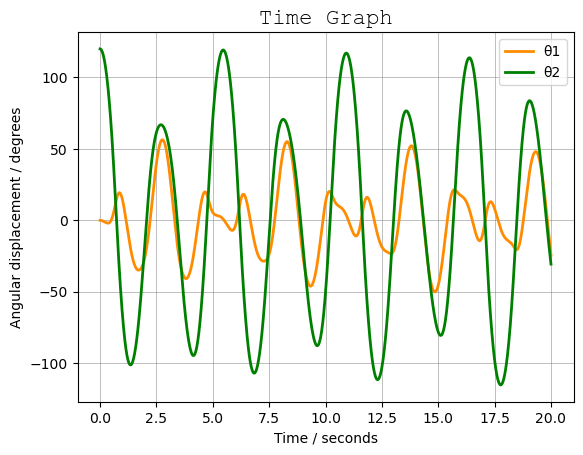

In [19]:
time_graph2 = pendulum2.time_graph()
plt.show(time_graph2)

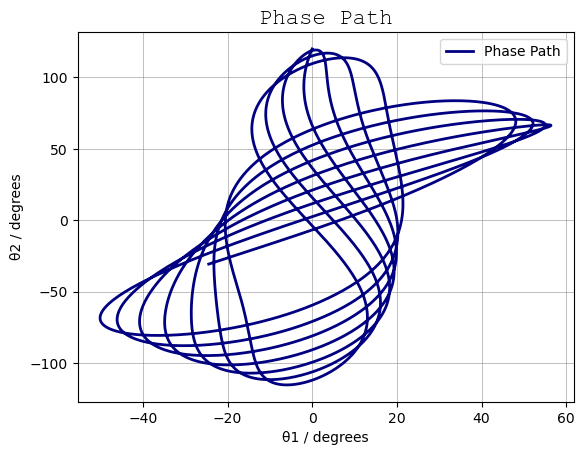

In [20]:
phase_path2 = pendulum2.phase_path()
plt.show(phase_path2)

In [21]:
# Precompute the positions of the pendulum bobs
pendulum2.precompute_positions()

# Create animation of the double pendulum
animation2 = pendulum2.animate_pendulum(trace=True, static=False, appearance='dark')
#animation2.show()

In [22]:
# Accessing the matrix
pendulum2.matrix

Eq(Matrix([
[   Derivative(theta1(t), t)],
[   Derivative(theta2(t), t)],
[Derivative(p_theta_1(t), t)],
[Derivative(p_theta_2(t), t)]]), Matrix([
[                                                                                                                                                                                                                                                                                                            6*(-6*M2*l1*l2*p_theta_2(t)*cos(theta1(t) - theta2(t)) + 14*M2*l2**2*p_theta_1(t))/(M2*l1**2*l2**2*(49*M1 + 9*M2*sin(theta1(t) - theta2(t))**2 + 12*M2))],
[                                                                                                                                                                                                                                                                                   6*(14*M1*l1**2*p_theta_2(t) + 6*M2*l1**2*p_theta_2(t) - 6*M2*l1*l2*p_theta_1(t)*cos(theta1(t) - theta2(t)))/(M2*l1**2*l2*